# Importing the libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Importing the dataset and  Converting the flower names to numbers

In [33]:

df = pd.read_csv("iris.data", 
                  sep=',', 
                  names=[" sepal length", "sepal width", "petal length", "petal width","Flower Name"])
df.iloc[:,-1] = df.iloc[:,-1].replace(['Iris-setosa'], '0')
df.iloc[:,-1] = df.iloc[:,-1].replace(['Iris-versicolor'], '1')
df.iloc[:,-1] = df.iloc[:,-1].replace(['Iris-virginica'], '2')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = np.reshape(y,(-1,1))
df

,sepal length,sepal width,petal length,petal width,Flower Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Finding suitable model

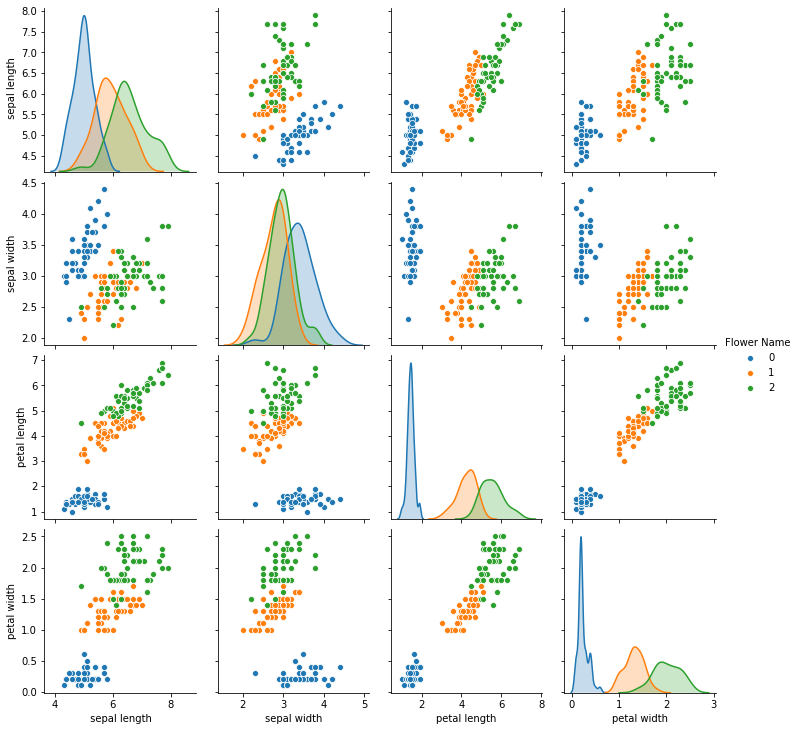

In [34]:
scaler = StandardScaler()
scaler.fit(df.drop('Flower Name',axis=1))
scaled_features = scaler.transform(df.drop('Flower Name',axis=1))
scaler_trans = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler_trans.head() 
import seaborn as sns
sns.pairplot(df,hue = 'Flower Name' )

# Splitting the the module

In [35]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

# Standard Scaling

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression Model to database

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting new value

In [38]:
y_pred = classifier.predict(X_test)
y_pred = np.reshape(y_pred,(-1,1))
np.shape(y_pred)
y_pred 
y_test


array([['2'],
       ['1'],
       ['0'],
       ['2'],
       ['0'],
       ['2'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['2'],
       ['1'],
       ['0'],
       ['0'],
       ['2'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['2'],
       ['1'],
       ['0'],
       ['2'],
       ['2'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['0'],
       ['2'],
       ['0'],
       ['0'],
       ['1'],
       ['2'],
       ['2'],
       ['2'],
       ['2'],
       ['1'],
       ['2'],
       ['1'],
       ['1'],
       ['2'],
       ['2'],
       ['2'],
       ['2'],
       ['1'],
       ['2'],
       ['1'],
       ['0'],
       ['2'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['2'],
       ['0'],
       ['0'],
       ['2'],
      

# Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0  0]
 [ 0 32  1]
 [ 0  4 27]]
